In [1]:
import torch

In [25]:
w = torch.tensor([[2, 3, 4]], dtype=torch.float32,requires_grad=True)
b = torch.tensor([3], dtype=torch.float32,requires_grad=True)
x = torch.tensor([[5, 2, 1]], dtype=torch.float32)
y = torch.tensor([7], dtype=torch.float32)

In [26]:
import copy
losses = []
gradients = []
for i in range(550):
    output = x @ w.T + b
    loss = (output - y)**2

    loss.backward()
    losses.append(loss.item())
    gradients.append(copy.deepcopy(w.grad))
    with torch.no_grad():

        w -= 0.01 * w.grad
        b -= 0.01 * b.grad
        w.grad.zero_()
        b.grad.zero_()


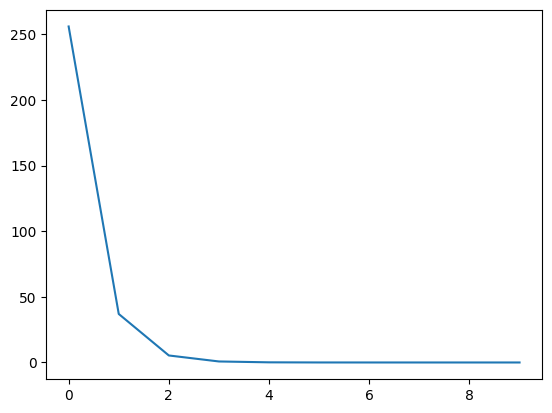

In [14]:
import matplotlib.pyplot as plt 
plt.plot(losses[:10])

In [15]:
losses[7]

0.00033513642847537994

In [19]:
import numpy as np

In [27]:
gradients

[tensor([[160.,  64.,  32.]]),
 tensor([[60.8000, 24.3200, 12.1600]]),
 tensor([[23.1040,  9.2416,  4.6208]]),
 tensor([[8.7795, 3.5118, 1.7559]]),
 tensor([[3.3362, 1.3345, 0.6672]]),
 tensor([[1.2678, 0.5071, 0.2536]]),
 tensor([[0.4817, 0.1927, 0.0963]]),
 tensor([[0.1831, 0.0732, 0.0366]]),
 tensor([[0.0696, 0.0278, 0.0139]]),
 tensor([[0.0264, 0.0106, 0.0053]]),
 tensor([[0.0100, 0.0040, 0.0020]]),
 tensor([[0.0038, 0.0015, 0.0008]]),
 tensor([[0.0014, 0.0006, 0.0003]]),
 tensor([[0.0005, 0.0002, 0.0001]]),
 tensor([[2.0981e-04, 8.3923e-05, 4.1962e-05]]),
 tensor([[7.6294e-05, 3.0518e-05, 1.5259e-05]]),
 tensor([[2.8610e-05, 1.1444e-05, 5.7220e-06]]),
 tensor([[9.5367e-06, 3.8147e-06, 1.9073e-06]]),
 tensor([[4.7684e-06, 1.9073e-06, 9.5367e-07]]),
 tensor([[4.7684e-06, 1.9073e-06, 9.5367e-07]]),
 tensor([[0., 0., 0.]]),
 tensor([[0., 0., 0.]]),
 tensor([[0., 0., 0.]]),
 tensor([[0., 0., 0.]]),
 tensor([[0., 0., 0.]]),
 tensor([[0., 0., 0.]]),
 tensor([[0., 0., 0.]]),
 tensor([[0.,

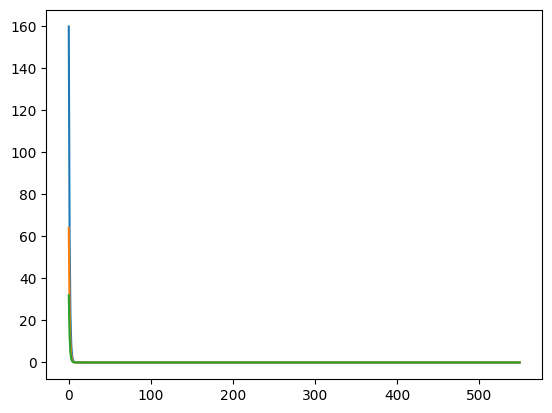

In [31]:
plt.plot(np.array(gradients)[:,0])

In [21]:
np.array(gradients)[:,0]

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       ...,
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]], dtype=float32)

In [33]:
class SGD():
    def __init__(self, params, momentum, dampening, lr):
        self.params = params
        self.momentum = momentum
        self.velocities = None
        self.dampening = dampening
        self.lr = lr
    def step(self):
        if self.velocities is None:
            self.velocities = [param.grad for param in self.params]
        
        for n, param in enumerate(self.params):
            with torch.no_grad():
                forward_velocity = self.momentum* self.velocities[n]+(1-self.dampening)*param.grad
                param -= self.lr * forward_velocity
                self.velocities[n] = forward_velocity
        
    def zero_grad(self):
        for param in self.params:
            param.grad.zero_()
                

In [42]:
w1 = torch.rand((5, 3), dtype=torch.float32, requires_grad=True)
w2 = torch.rand((5, 1), dtype=torch.float32, requires_grad=True)
b1 = torch.rand(5 ,dtype=torch.float32, requires_grad=True)
b2 = torch.rand(1 ,dtype=torch.float32, requires_grad=True)

In [35]:
x = torch.rand((10,3), dtype=torch.float32)
y = torch.rand((10, 1), dtype=torch.float32)

In [43]:
optimizer = SGD([w1,w2,b1,b2], 0.9, 0.9, 1e-2)

In [37]:
import torch.nn.functional as F

In [44]:
losses = []
for epoch in range(100):
    running_loss = 0
    for n, X in enumerate(x):
        hidden = F.relu(X @ w1.T + b1)
        output = hidden @ w2 + b2
        loss = (output - y[n])**2
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
        running_loss += loss.item()
    losses.append(running_loss / y.shape[0])
    

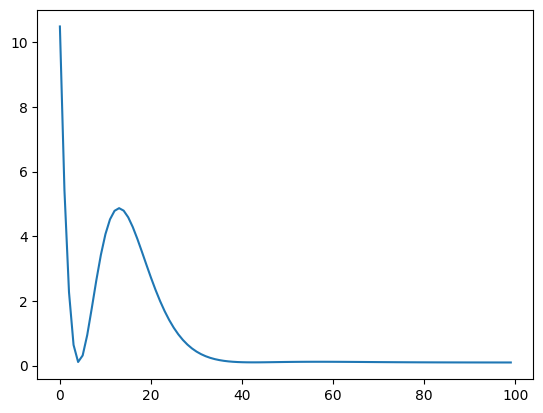

In [45]:
plt.plot(losses)

In [40]:
np.min(losses)

0.07626253815978998

In [46]:
np.min(losses)

0.09483762085437775